In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

### 3 юнит

Предобработка данных

In [2]:
covid_data = pd.read_csv('data/covid_data.csv')
covid_data.head(3)

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0


In [3]:
vaccination_data = pd.read_csv('data/country_vaccinations.csv')
vaccination_data = vaccination_data[
    ['country', 'date', 'total_vaccinations',
     'people_vaccinated', 'total_vaccinations_per_hundred',
     'people_fully_vaccinated','people_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]
vaccination_data.head(3)

,country,date,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,0.0,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [4]:
# Группируем данные по дате и стране,
# суммируя подтвержденные случаи, смерти и выздоровления
covid_data = covid_data.groupby(
    ['date', 'country'], as_index=False
    )[['confirmed', 'deaths', 'recovered']].sum()

covid_data.head(3)

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0


In [5]:
# Преобразуем столбец 'date' в формат datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [6]:
# Вычисляем количество активных случаев
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] \
                       - covid_data['recovered']

In [7]:
# Сортируем данные по стране и дате
covid_data = covid_data.sort_values(by=['country', 'date'])

# Вычисляем ежедневные изменения для подтвержденных случаев, смертей и выздоровлений
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('deaths')['confirmed'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

covid_data.head(3)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
# Преобразуем столбец 'date' в формат datetime
vaccination_data['date'] = pd.to_datetime(vaccination_data['date'])
vaccination_data.head(3)

,country,date,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,0.0,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [9]:
# Задание 3.1

# Определяем первый и последний дни в наборе данных
covid_data['date'].agg(['min', 'max'])

min   2020-01-22
max   2021-05-29
Name: date, dtype: datetime64[ns]

In [10]:
# Задание 3.2

# Определяем первый и последний дни в наборе данных
vaccination_data['date'].agg(['min', 'max'])

min   2020-12-02
max   2021-09-06
Name: date, dtype: datetime64[ns]

In [11]:
# Задание 3.3

# Объединяем два датафрейма по столбцам 'date' и 'country'
covid_df = covid_data.merge(
    vaccination_data,
    on=['date', 'country'], how='left')

# Проверяем размер объединенного датафрейма
print(covid_df.shape)
covid_df.head(3)

(86785, 16)


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Задание 3.4

# Создаем признаки общей процентной смертности и 
# общий процент случаев выздоровления
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

mask = covid_df['country'] == 'United States'
print(f'Макс. летальность в США за весь период: {covid_df[mask]['death_rate'].max():.2f}')

Макс. летальность в США за весь период: 7.19


In [13]:
# Задание 3.5

mask = covid_df['country'] == 'Russia'
print(f'Средний процент выздоровевших в России: {covid_df[mask]['recover_rate'].mean():.2f}')

Средний процент выздоровевших в России: 67.06


In [14]:
# Сохраняем объединенный датафрейм в файл CSV
covid_df.to_csv('data/covid_df.csv', index=False)

### 4 юнит

In [15]:
covid_df = pd.read_csv('data/covid_df.csv')
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head(3)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


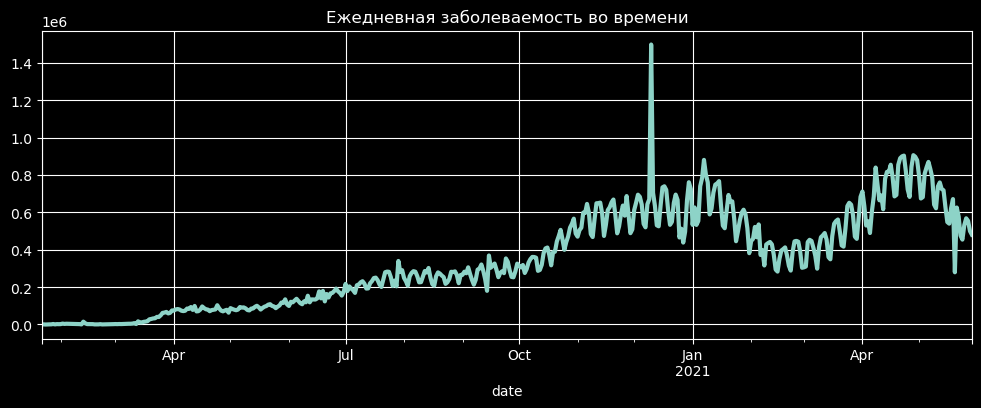

In [ ]:
# Сгруппируем данные по дате, суммируя ежедневные подтвержденные случаи
# и построим линейный график
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=3)

plt.show()

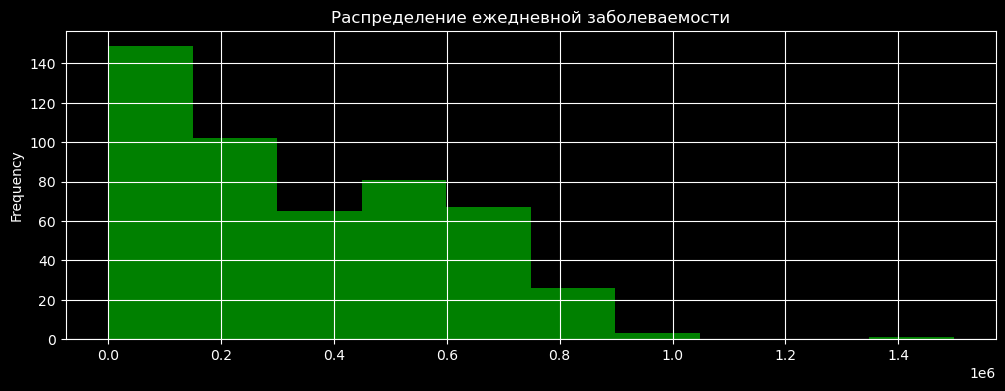

In [ ]:
# Построим гистограмму распределения ежедневной заболеваемости
grouped_cases.plot(
    kind='hist',
    figsize=(12, 4),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='green',
    bins=10)

plt.show()

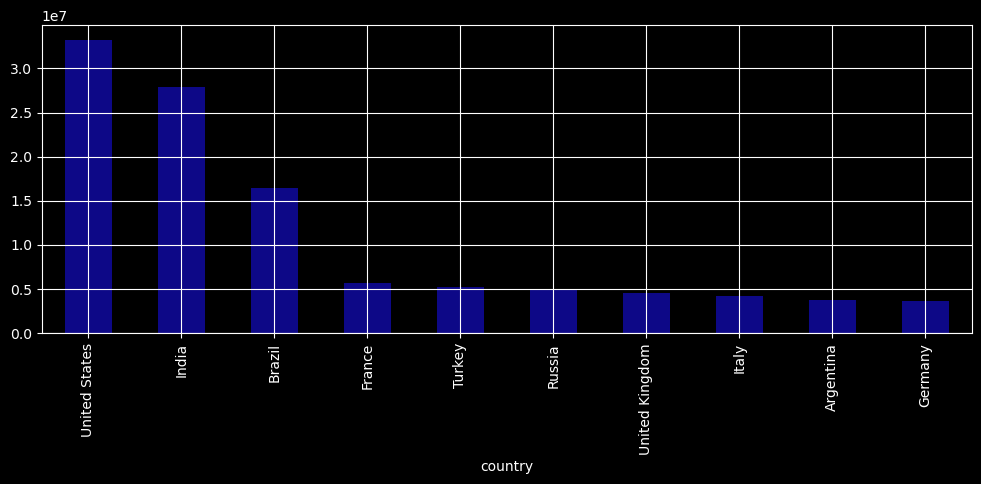

In [ ]:
# Сгруппируем данные по странам, и вычислим последний зафиксированный показатель
grouped_country = covid_df.groupby('country')['confirmed'].last()
grouped_country = grouped_country.nlargest(10)

# Построим столбчатую диаграмму для 10 стран с наибольшим числом подтвержденных случаев
grouped_country.plot(
    kind='bar',
    figsize=(12, 4),
    grid=True,
    colormap='plasma')

plt.show()

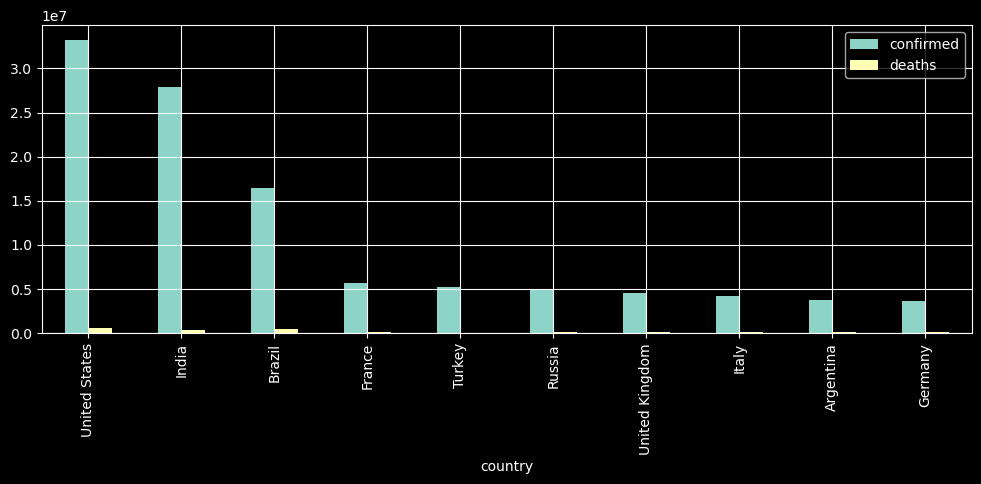

In [ ]:
# Построим столбчатую диаграмму для 10 стран с наибольшим числом подтвержденных случаев и смертей
# Возьмем последние значения по странам и отсортируем по числу подтвержденных случаев
grouped_country = covid_df.groupby('country')[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns='confirmed')

grouped_country.plot(
    kind='bar',
    figsize=(12, 4),
    grid=True)

plt.show()

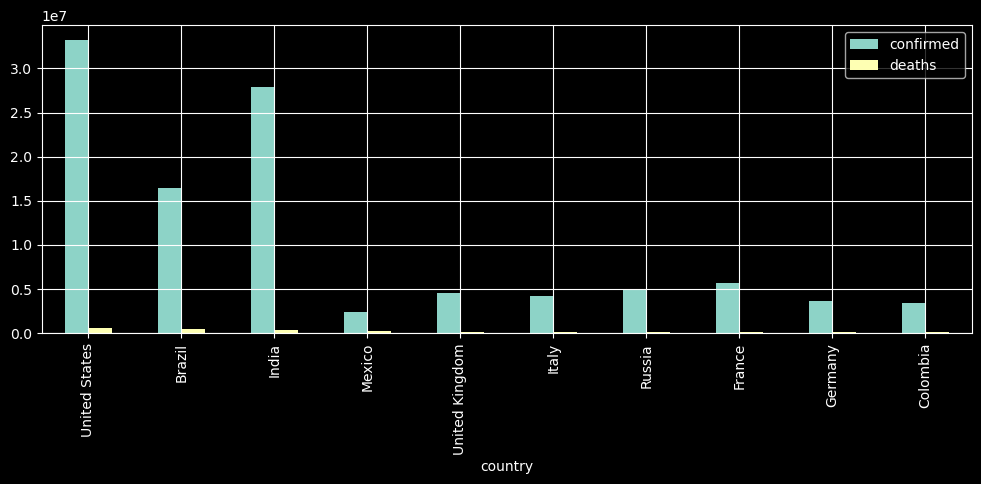

In [ ]:
# Построим столбчатую диаграмму для 10 стран с наибольшим числом подтвержденных случаев и смертей
# Возьмем последние значения по странам и отсортируем по числу смертей
grouped_country = covid_df.groupby('country')[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns='deaths')

grouped_country.plot(
    kind='bar',
    figsize=(12, 4),
    grid=True)

plt.show()

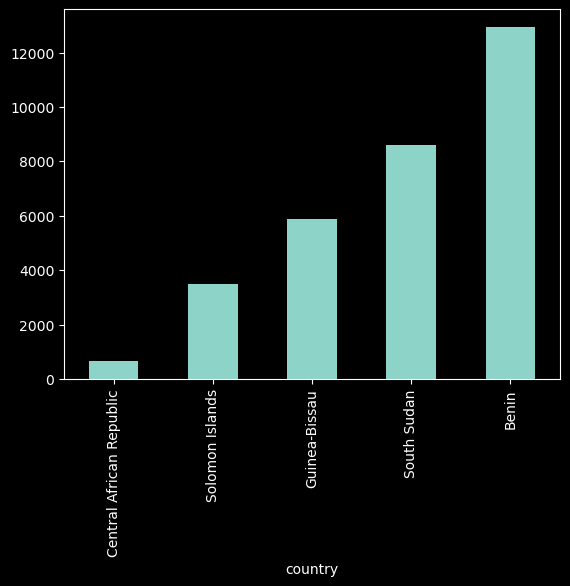

In [ ]:
#  Задание 4.4

# Построим диаграмму для 5 стран с наименьшим общим числом вакцинаций
# на последний день рассматриваемого периода
covid_df.groupby('country')['total_vaccinations'].last().nsmallest(5).plot(kind='bar')
plt.show()